# Intro
This notebook downloads the entire MIT-BIH Arrhythmia Database, which is publicly available here: https://physionet.org/physiobank/database/mitdb/

It then plots a small sample for a given file and channel. By changing the variables below, you can change which file, channel, and sample you want to plot.

The intend of this notebook is to become familiar with the MIT-BIH data before using it in your machine learning project.

In [1]:
# Change the values below to change your data selection.

FILE=1                # There are 48 files.
CHANNEL=0             # There are 2 channels
SAMPLE_START=114000   # Start of the sample in the file.
SAMPLE_SIZE=4000      # Number of readings (360 per second).

# Initialize
Import dependencies.

First, We will need to download and install the [mitdb](https://github.com/Nospoko/qrs-tutorial) library. The project contains convenience functions that make it easier to download and read [WFDB](https://physionet.org/physiotools/wfdb.shtml) compatible files.

In [ ]:
!pip install tqdm
!pip install wfdb
!pip install datasets

In [ ]:
!pip install wfdb
import wfdb as wf
wf.dl_database('mitdb', './mitdb')
import numpy as np
from matplotlib import pyplot as plt

# Load File
Pick one of the MIT-BIH files and load it.

Total files: 48
Loading file: ./mitdb/100
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 2274


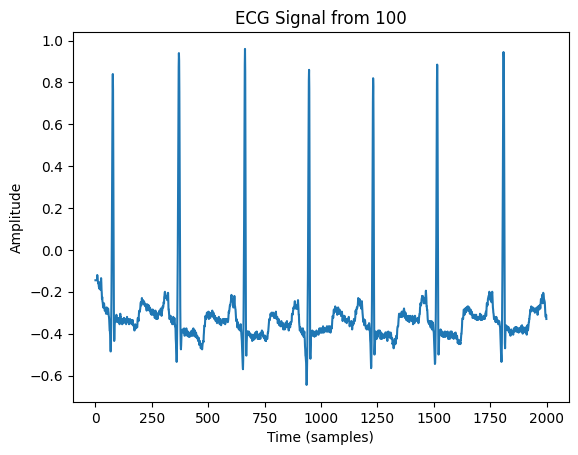

In [6]:
# List available records in the database
dbfiles = wf.get_record_list('mitdb')  # Correct method for listing record files
print('Total files:', len(dbfiles))

# Pick a specific file (e.g., the first file in the list)
FILE = 0  # Change this index to select a different file
datfile = f'./mitdb/{dbfiles[FILE]}'
print('Loading file:', datfile)

# Read the signal and annotations from the file
record = wf.rdsamp(datfile)  # Reads signal data
annotation = wf.rdann(datfile, 'atr')  # Reads annotation data

# Display information about the data
print('Sampling frequency:', record[1].get('fs'))
print('Data shape:', record[0].shape)
print('Annotations:', len(annotation.num))

# Plot the signal (first 2000 samples for visualization)
plt.plot(record[0][:2000, 0])  # Use the first channel for ECG signal
plt.title(f"ECG Signal from {dbfiles[FILE]}")
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

# Plot
Visualize the selected data. Heatbeat data and associated annotations are displayed.

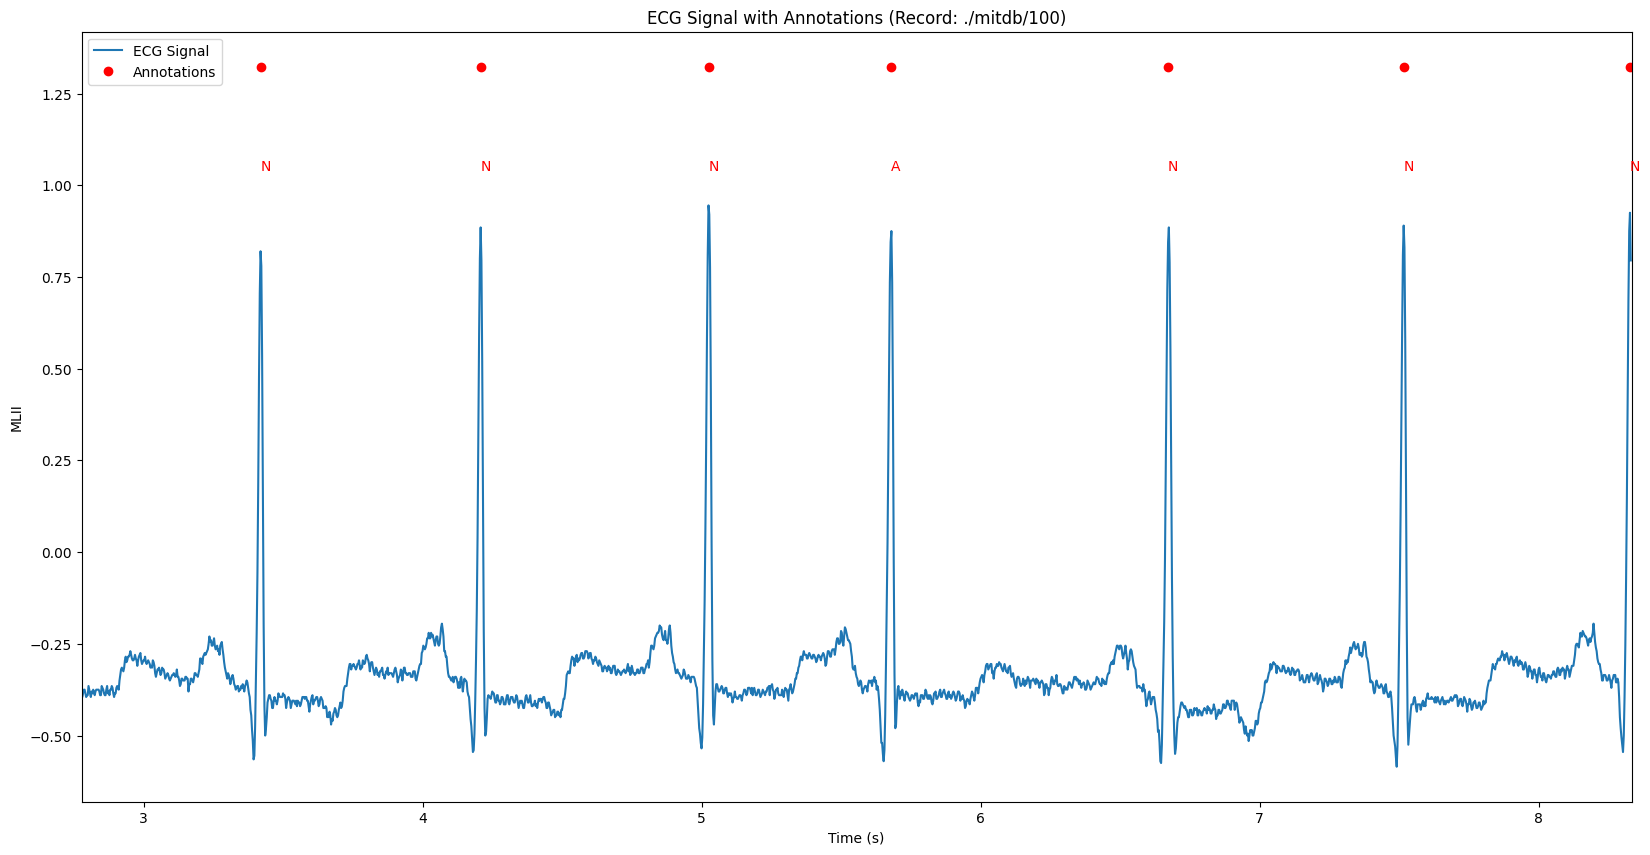

In [8]:
# Define constants for the desired sample range and channel
SAMPLE_START = 1000  # Adjust as needed
SAMPLE_SIZE = 2000   # Number of samples to analyze
CHANNEL = 0          # Channel index (0 for the first channel)

# Read the record and annotations
record = wf.rdsamp(datfile)
annotation = wf.rdann(datfile, 'atr')

# Extract data for the specified range and channel
sample_end = SAMPLE_START + SAMPLE_SIZE
channel = record[0][SAMPLE_START:sample_end, CHANNEL]

# Time scale for plotting (in seconds)
times = (np.arange(SAMPLE_SIZE, dtype='float') + SAMPLE_START) / record[1].get('fs')

# Plot the ECG signal
plt.figure(figsize=(20, 10))
plt.plot(times, channel, label="ECG Signal")

# Extract and plot annotations within the selected range
where = np.logical_and(annotation.sample >= SAMPLE_START, annotation.sample < sample_end)
annots = annotation.sample[where] - SAMPLE_START
annotypes = np.array(annotation.symbol)
annotypes = annotypes[where]

# Annotation times
annotimes = times[annots]
plt.plot(annotimes, np.ones_like(annotimes) * channel.max() * 1.4, 'ro', label="Annotations")

# Label the annotations
for idx, annot in enumerate(annots):
    plt.annotate(annotypes[idx], xy=(times[annot], channel.max() * 1.1), color='red')

# Set plot limits and labels
plt.xlim([SAMPLE_START / record[1].get('fs'), sample_end / record[1].get('fs')])
plt.xlabel('Time (s)')
plt.ylabel(record[1].get('sig_name')[CHANNEL])
plt.title(f"ECG Signal with Annotations (Record: {datfile})")
plt.legend()
plt.show()
